## Imports


In [1]:
# main imports
import numpy as np
import pandas as pd

# my utils
from utils import preprocessUtils as utils
from utils import helperUtils

from scipy.stats import rv_discrete

# import sic-learn modules/ ml algoriths
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# repressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor



# visualization
from IPython.display import display, HTML
from tabulate import tabulate
from matplotlib import pyplot as plt
import seaborn as sns
# ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

## Load Dataset

Use pandas in order to load dataset from txt into dataframe using " " as seperator.

In [2]:
dataset_17x7_path = "datasets/17x7.txt"
dataset_20x10_path = "datasets/20x10.txt"

is20x10 = False
total_products = 20 if is20x10 else 17

df_17x7 = pd.read_csv(dataset_17x7_path, sep=" ", header=None)
df_20x10 = pd.read_csv(dataset_20x10_path, sep=" ", header=None)

## Preprocess Datasets
- Add column names
- clean Dataframes. By cleaning dataframes we create
a new dataframe consist of all products indexed by
assortment_id, assortment_revenue, itemId and columns
of each item

In [3]:
# add column names to datasets
df_17x7 = utils.addColumnNamesToRawData(df_17x7, 7)
df_20x10 = utils.addColumnNamesToRawData(df_20x10, 10)

# keep a copy of original dfs
df_17x7_original = df_17x7.copy(deep = True)
df_20x10_original = df_20x10.copy(deep = True)

# clean datasets
clean_df_17x7 = utils.cleanRawData(df_17x7, 7)
clean_df_20x10 = utils.cleanRawData(df_20x10, 10)

# display datasets
display(clean_df_17x7)
display(clean_df_20x10)

total_sale_avg  \
assorment_id produc_id total_assortment_revenue                   
0            0         425.8133                           84.00   
             2         425.8133                           37.33   
             3         425.8133                           62.67   
             4         425.8133                           17.33   
             7         425.8133                          100.00   
...                                                         ...   
7841         2         390.8000                           26.67   
             6         390.8000                           49.33   
             10        390.8000                           62.67   
             12        390.8000                           16.00   
             15        390.8000                           38.67   

                                                 exclusive_sale_avg  \
assorment_id produc_id total_assortment_revenue                       
0            0         425.8133                                 0.0   
             2         425.8133                                 0.0   
             3         425.8133                                 0.0   
             4         425.8133                                 0.0   
             7         425.8133                                16.0   
...                                                             ...   
7841         2         390.8000                                 0.0   
             6         390.8000                                 0.0   
             10        390.8000                                 0.0   
             12        390.8000                                 0.0   
             15        390.8000                                 0.0   

                                                 revenue_contribution  
assorment_id produc_id total_assortment_revenue                        
0            0         425.8133                                 20.43  
             2         425.8133                                  3.32  
             3         425.8133                                 11.12  
             4         425.8133                                  0.64  
             7         425.8133                                 42.99  
...                                                               ...  
7841         2         390.8000                                  2.26  
             6         390.8000                                  8.78  
             10        390.8000                                 13.53  
             12        390.8000                                  1.02  
             15        390.8000                                  5.92  

[54894 rows x 3 columns]

total_sale_avg  \
assorment_id produc_id total_assortment_revenue                   
0            1         1896.4706                          68.24   
             2         1896.4706                           7.06   
             6         1896.4706                          37.65   
             7         1896.4706                          14.12   
             8         1896.4706                          45.88   
...                                                         ...   
18939        9         1643.4118                          91.76   
             11        1643.4118                          22.35   
             15        1643.4118                          62.35   
             16        1643.4118                          42.35   
             19        1643.4118                          69.41   

                                                 exclusive_sale_avg  \
assorment_id produc_id total_assortment_revenue                       
0            1         1896.4706                               0.00   
             2         1896.4706                               0.00   
             6         1896.4706                               0.00   
             7         1896.4706                               0.00   
             8         1896.4706                               0.00   
...                                                             ...   
18939        9         1643.4118                              12.94   
             11        1643.4118                               0.00   
             15        1643.4118                               0.00   
             16        1643.4118                               0.00   
             19        1643.4118                               0.00   

                                                 revenue_contribution  
assorment_id produc_id total_assortment_revenue                        
0            1         1896.4706                                12.41  
             2         1896.4706                                 0.06  
             6         1896.4706                                 3.20  
             7         1896.4706                                 0.19  
             8         1896.4706                                 4.92  
...                                                               ...  
18939        9         1643.4118                                33.75  
             11        1643.4118                                 1.55  
             15        1643.4118                                10.13  
             16        1643.4118                                 4.42  
             19        1643.4118                                12.47  

[189400 rows x 3 columns]

## Analysi dedomenon gia Dataset 17x7
- Analysi susxetisewn twn xaraktiristikwn tou kathe proiontos
- eksagwgi meson xaraktiristikwn ana proiwn

,total_sale_avg,exclusive_sale_avg,revenue_contribution
count,54894.000000,54894.000000,54894.000000
mean,56.168084,2.010494,14.047374
std,28.473162,5.146362,13.432439
min,1.330000,0.000000,0.050000
25%,30.670000,0.000000,2.860000
50%,56.000000,0.000000,9.840000
75%,81.330000,0.000000,22.160000
max,100.000000,29.330000,55.910000


,total_sale_avg,exclusive_sale_avg,revenue_contribution
total_sale_avg,1.000000,0.578907,0.921358
exclusive_sale_avg,0.578907,1.000000,0.810503
revenue_contribution,0.921358,0.810503,1.000000


<Figure size 576x576 with 0 Axes>

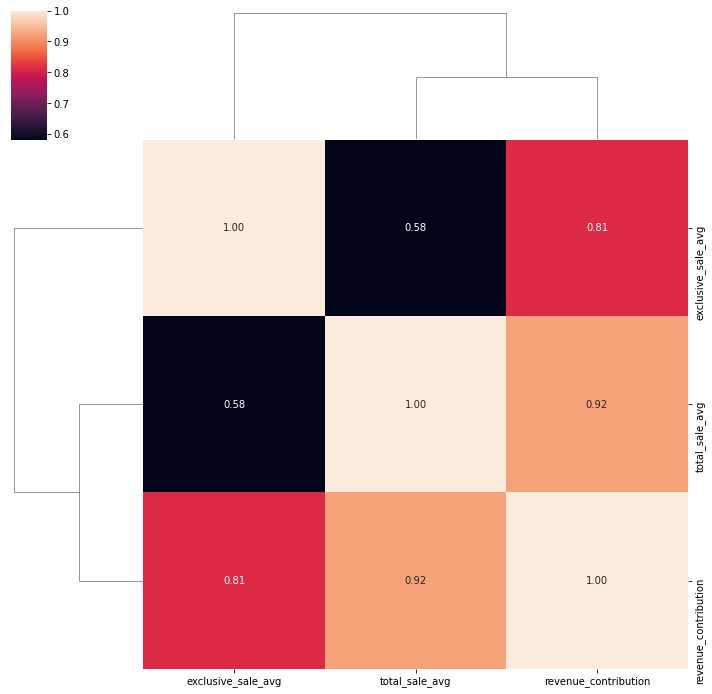

In [4]:
# step 1
display(clean_df_17x7.describe())

# step 2
corrMatrix = clean_df_17x7.corr()
display(corrMatrix.head())
plt.figure(figsize =(8,8))
sns.clustermap(corrMatrix, annot = True,  fmt = ".2f")
plt.show()

In [5]:
stats_df_17x7 = clean_df_17x7.copy(deep=True)
stats_df_17x7.reset_index(drop=False, inplace=True)
stats_df_17x7.drop(columns=["assorment_id"], inplace=True)
stats_df_17x7 = stats_df_17x7.groupby(['produc_id']).mean()
stats_df_17x7.index = stats_df_17x7.index.map(str)

stats_df_17x7

,total_assortment_revenue,total_sale_avg,exclusive_sale_avg,revenue_contribution
produc_id,,,,
0,412.210079,74.767082,1.602888,18.916481
1,429.189484,87.773491,5.271234,30.813594
2,397.387950,35.195528,0.000000,3.507274
3,408.388641,56.027797,0.034020,10.802318
4,392.196197,19.211722,0.000000,0.785088
5,392.153462,14.040109,0.000000,0.505239
6,408.430576,61.520130,0.148742,12.662482
7,430.529747,98.335739,14.056920,40.768995
8,394.013666,24.596875,0.000000,1.750305


Text(0.5, 1.0, 'Avg Revenue Contribution Per Item')

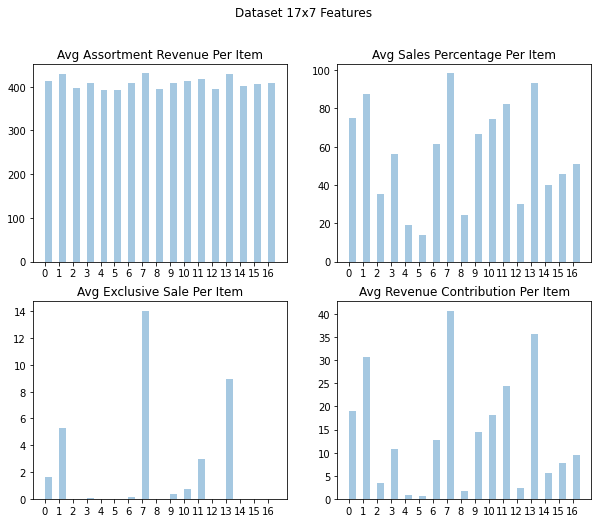

In [6]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
fig.suptitle('Dataset 17x7 Features')


# create a bar plot for Avg Assortment Revenue
axs[0,0].bar(stats_df_17x7.index, stats_df_17x7['total_assortment_revenue'], alpha=0.4, align='edge', width=0.5)
axs[0,0].set_title("Avg Assortment Revenue Per Item") 

# create a bar plot for Avg sale_avg
axs[0,1].bar(stats_df_17x7.index, stats_df_17x7['total_sale_avg'], alpha=0.4, align='edge', width=0.5)
axs[0,1].set_title("Avg Sales Percentage Per Item") 

# create a bar plot for Avg exclusive_sale
axs[1,0].bar(stats_df_17x7.index, stats_df_17x7['exclusive_sale_avg'], alpha=0.4, align='edge', width=0.5)
axs[1,0].set_title("Avg Exclusive Sale Per Item") 

# create a bar plot for Avg revenue_contribution
axs[1,1].bar(stats_df_17x7.index, stats_df_17x7['revenue_contribution'], alpha=0.4, align='edge', width=0.5)
axs[1,1].set_title("Avg Revenue Contribution Per Item") 


## Analysi dedomenon gia Dataset 20x10
- Analysi susxetisewn twn xaraktiristikwn tou kathe proiontos
- eksagwgi meson xaraktiristikwn ana proiwn

,total_sale_avg,exclusive_sale_avg,revenue_contribution
count,189400.000000,189400.000000,189400.000000
mean,51.836220,0.943952,9.422042
std,27.426311,3.004804,9.567119
min,0.000000,0.000000,0.000000
25%,28.240000,0.000000,1.750000
50%,51.760000,0.000000,6.300000
75%,75.290000,0.000000,14.280000
max,100.000000,23.530000,44.320000


,total_sale_avg,exclusive_sale_avg,revenue_contribution
total_sale_avg,1.000000,0.486161,0.912517
exclusive_sale_avg,0.486161,1.000000,0.744359
revenue_contribution,0.912517,0.744359,1.000000


<Figure size 576x576 with 0 Axes>

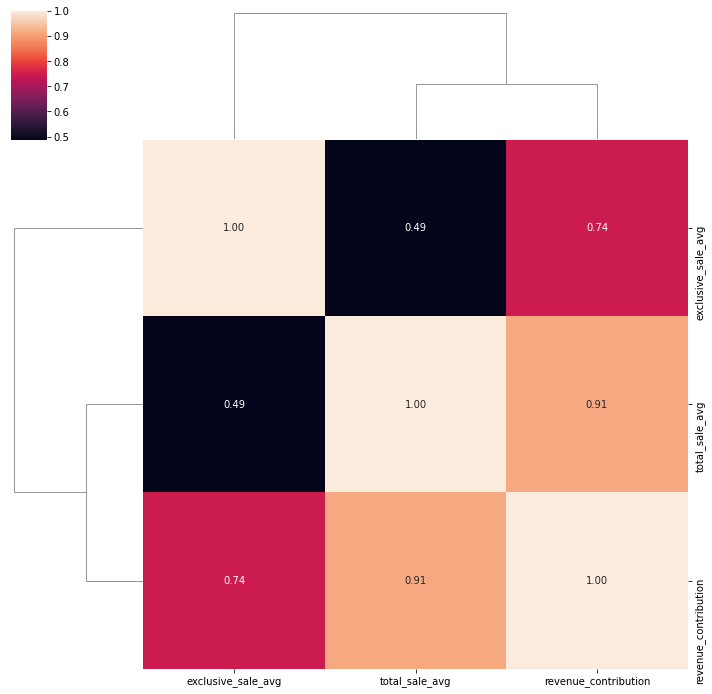

In [7]:
# step 1
display(clean_df_20x10.describe())

# step 2
corrMatrix = clean_df_20x10.corr()
display(corrMatrix.head())
plt.figure(figsize =(8,8))
sns.clustermap(corrMatrix, annot = True,  fmt = ".2f")
plt.show()

In [8]:
stats_df_20x10 = clean_df_20x10.copy(deep=True)
stats_df_20x10.reset_index(drop=False, inplace=True)
stats_df_20x10.drop(columns=["assorment_id"], inplace=True)
stats_df_20x10 = stats_df_20x10.groupby(['produc_id']).mean()
stats_df_20x10.index = stats_df_20x10.index.map(str)

stats_df_20x10

,total_assortment_revenue,total_sale_avg,exclusive_sale_avg,revenue_contribution
produc_id,,,,
0,1796.227751,9.433503,0.000000,0.035592
1,1879.157100,78.598989,1.147323,17.275509
2,1797.945353,13.932996,0.000000,0.133945
3,1799.612149,22.891906,0.000000,0.535468
4,1848.639613,58.753448,0.006324,8.522577
5,1881.128055,78.610366,0.527570,17.141416
6,1822.473682,36.507547,0.000000,3.409538
7,1796.340124,18.454857,0.000000,0.286738
8,1838.126970,45.246078,0.000000,5.303335


Text(0.5, 1.0, 'Avg Revenue Contribution Per Item')

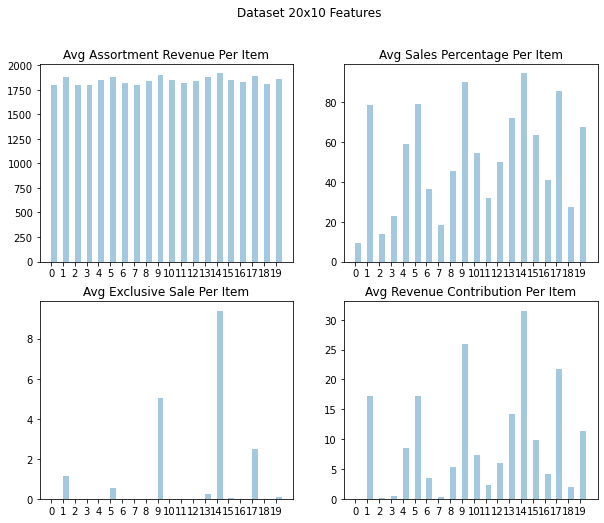

In [9]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
fig.suptitle('Dataset 20x10 Features')


# create a bar plot for Avg Assortment Revenue
axs[0,0].bar(stats_df_20x10.index, stats_df_20x10['total_assortment_revenue'], alpha=0.4, align='edge', width=0.5)
axs[0,0].set_title("Avg Assortment Revenue Per Item") 

# create a bar plot for Avg sale_avg
axs[0,1].bar(stats_df_20x10.index, stats_df_20x10['total_sale_avg'], alpha=0.4, align='edge', width=0.5)
axs[0,1].set_title("Avg Sales Percentage Per Item") 

# create a bar plot for Avg exclusive_sale
axs[1,0].bar(stats_df_20x10.index, stats_df_20x10['exclusive_sale_avg'], alpha=0.4, align='edge', width=0.5)
axs[1,0].set_title("Avg Exclusive Sale Per Item") 

# create a bar plot for Avg revenue_contribution
axs[1,1].bar(stats_df_20x10.index, stats_df_20x10['revenue_contribution'], alpha=0.4, align='edge', width=0.5)
axs[1,1].set_title("Avg Revenue Contribution Per Item") 

# Metatropi tou provlimatos se regression provlima

### Erotima 1.A

In [10]:
target_item_id = 6

clean_df = clean_df_20x10 if is20x10 else clean_df_17x7
df_original = df_20x10_original.copy(deep=True) if is20x10 else df_17x7_original.copy(deep=True)

assortment_ids = utils.get_assortments_with_item_id(clean_df, target_item_id)

filtered_by_item_df = df_original.iloc[assortment_ids]
filtered_by_item_df

,produc_id,total_sale_avg,exclusive_sale_avg,revenue_contribution,produc_id,total_sale_avg,exclusive_sale_avg,revenue_contribution,produc_id,total_sale_avg,...,revenue_contribution,produc_id,total_sale_avg,exclusive_sale_avg,revenue_contribution,produc_id,total_sale_avg,exclusive_sale_avg,revenue_contribution,total_assortment_revenue
1,2,45.33,0.0,4.38,4,12.00,0.00,0.46,6,60.00,...,14.24,11,88.00,0.00,25.34,13,100.00,12.0,42.07,409.8400
3,2,38.67,0.0,3.85,4,9.33,0.00,0.37,6,54.67,...,15.25,10,85.33,0.00,23.06,12,21.33,0.0,1.56,380.3200
5,0,53.33,0.0,9.65,6,41.33,0.00,6.42,7,98.67,...,14.30,11,82.67,0.00,22.02,15,26.67,0.0,3.57,434.2667
7,0,77.33,0.0,16.81,2,10.67,0.00,0.79,6,56.00,...,24.20,15,26.67,0.00,3.59,16,36.00,0.0,5.44,442.6400
8,2,53.33,0.0,5.40,3,65.33,0.00,12.59,4,33.33,...,17.03,7,97.33,5.33,36.49,10,92.00,0.0,23.59,414.5067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836,2,32.00,0.0,2.62,3,42.67,0.00,6.61,4,14.67,...,38.43,9,74.67,0.00,14.59,13,84.00,0.0,25.10,444.2400
7837,1,66.67,0.0,16.01,2,25.33,0.00,1.91,6,38.67,...,0.64,10,57.33,0.00,9.93,13,86.67,0.0,26.24,466.0000
7839,3,45.33,0.0,6.74,6,58.67,0.00,9.58,7,98.67,...,0.60,13,86.67,0.00,25.85,15,30.67,0.0,4.04,468.6667
7840,0,89.33,0.0,22.61,1,98.67,9.33,38.77,2,33.33,...,0.52,6,58.67,0.00,10.37,10,73.33,0.0,15.66,432.6933


In [11]:
columnNames = utils.columnNames_builder(total_products, "target_revenue_contribution")

test = filtered_by_item_df.apply(lambda row: utils.df_A_builder(row, total_products, columnNames, target_item_id), axis=1)

# create df in order to predict target_revenue_contribution
df_A = pd.DataFrame(list(test), columns=columnNames)
df_A.drop("item {}".format(target_item_id), axis=1, inplace=True)
df_A

,item 0,item 1,item 2,item 3,item 4,item 5,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,target_revenue_contribution
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,46.721760
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,41.036528
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,27.879922
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,43.334456
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,70.590491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.158376
3223,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,26.515400
3224,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,44.898270
3225,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,44.870295


### Split dataset to train and test

In [12]:
y = df_A['target_revenue_contribution']
x = df_A.drop("target_revenue_contribution", axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
results = []

### Linear Regression For Case 1.A


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)
mse = mean_squared_error(y_test, lr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(np.sqrt(mse)))
print("Repressor accuracy based on (RMSE): {:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse))))

results.append({
    "algorithm": "LinearRegression",
    "test": "Exercise 1.A",
    "RMSE_score": "{:.4f}".format(np.sqrt(mse)),
    "RMSE_accuracy": "{:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse)))
})

The mean squared error (MSE) on test set: 54.5201
The root mean squared error (RMSE) on test set: 7.3838
Repressor accuracy based on (RMSE): 85.2426


### Applay gradiant boosting for 1.A

In [14]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(np.sqrt(mse)))
print("Repressor accuracy based on (RMSE): {:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse))))

results.append({
    "algorithm": "GradientBoostingRegressor",
    "test": "Exercise 1.A",
    "RMSE_score": "{:.4f}".format(np.sqrt(mse)),
    "RMSE_accuracy": "{:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse)))
})

The mean squared error (MSE) on test set: 103.7411
The root mean squared error (RMSE) on test set: 10.1853
Repressor accuracy based on (RMSE): 79.6434


## Case 1.A Use Neural Networks 
** set ups **

1. learning_rate = 0.002 batch size = 10 activation = 'relu'

    - 20, 50  -> (RMSE) on test set: 6.4965
    - 20, 80 -> (RMSE) on test set: 6.4451
    - 20, 70 -> (RMSE) on test set: 6.3555
    
2. learning_rate = 0.001 batch size = 10 activation = 'relu'
    - 20, 70 -> (RMSE) on test set: 6.3526
    - 


In [15]:
model = MLPRegressor(hidden_layer_sizes=(20, 70), activation='relu', solver='adam', alpha=0.0001, batch_size=10, learning_rate='constant',learning_rate_init=0.001,  random_state=7, early_stopping=True, )

# Training  
model.fit(X_train, y_train)

# Predict
mse = mean_squared_error(y_test, model.predict(X_test))

# Results
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(np.sqrt(mse)))
print("Repressor accuracy based on (RMSE): {:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse))))

results.append({
    "algorithm": "NuralNetwork",
    "test": "Exercise 1.A",
    "RMSE_score": "{:.4f}".format(np.sqrt(mse)),
    "RMSE_accuracy": "{:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse)))
})

The mean squared error (MSE) on test set: 40.3555
The root mean squared error (RMSE) on test set: 6.3526
Repressor accuracy based on (RMSE): 87.3036


## Case 2.A perform regression.

In [16]:
columnNames = utils.columnNames_builder(total_products, "total_assortment_revenue")
print(columnNames)

test = df_original.apply(lambda row: utils.df_B_builder(row, total_products, columnNames), axis=1)


df_B = pd.DataFrame(list(test), columns=columnNames)
df_B

['item 0', 'item 1', 'item 2', 'item 3', 'item 4', 'item 5', 'item 6', 'item 7', 'item 8', 'item 9', 'item 10', 'item 11', 'item 12', 'item 13', 'item 14', 'item 15', 'item 16', 'total_assortment_revenue']


,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,total_assortment_revenue
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,425.8133
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,409.8400
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,365.1733
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,380.3200
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,298.6933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,466.0000
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,425.0133
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,468.6667
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,432.6933


### Split Train Test dataset

In [17]:
y = df_B['total_assortment_revenue']
x = df_B.drop("total_assortment_revenue", axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# this list will contain results in dict format in order to display them into dataframe.

### Linear Regression For Case 2.A

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)

mse = mean_squared_error(y_test, lr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(np.sqrt(mse)))
print("Repressor accuracy based on (RMSE): {:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse))))

results.append({
    "algorithm": "LinearRegression",
    "test": "Exercise 2.A",
    "RMSE_score": "{:.4f}".format(np.sqrt(mse)),
    "RMSE_accuracy": "{:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse)))
})

The mean squared error (MSE) on test set: 409.7467
The root mean squared error (RMSE) on test set: 20.2422
Repressor accuracy based on (RMSE): 95.0554


### Applay gradiant boosting for 2.A



In [19]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(np.sqrt(mse)))
print("Repressor accuracy based on (RMSE): {:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse))))

results.append({
    "algorithm": "GradientBoostingRegressor",
    "test": "Exercise 2.A",
    "RMSE_score": "{:.4f}".format(np.sqrt(mse)),
    "RMSE_accuracy": "{:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse)))
})

The mean squared error (MSE) on test set: 566.7541
The root mean squared error (RMSE) on test set: 23.8066
Repressor accuracy based on (RMSE): 94.1848


## Case 2.A Use Neural Networks 
** set ups ** 


In [20]:
model = MLPRegressor(hidden_layer_sizes=(20, 70), activation='relu', solver='adam', alpha=0.0001, batch_size=10, learning_rate='constant',learning_rate_init=0.001,  random_state=7, early_stopping=True, )

# Training  
model.fit(X_train, y_train)

# Predict
mse = mean_squared_error(y_test, model.predict(X_test))

# Results
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(np.sqrt(mse)))
print("Repressor accuracy based on (RMSE): {:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse))))

results.append({
    "algorithm": "NuralNetwork",
    "test": "Exercise 2.A",
    "RMSE_score": "{:.4f}".format(np.sqrt(mse)),
    "RMSE_accuracy": "{:.4f}".format(helperUtils.calculateRMSE_PersentagePresision(y_train, np.sqrt(mse)))
})

The mean squared error (MSE) on test set: 411.5423
The root mean squared error (RMSE) on test set: 20.2865
Repressor accuracy based on (RMSE): 95.0446


## Regression Application Results

In [21]:
regressors_df = pd.DataFrame.from_dict(results)

regressors_df = regressors_df.set_index(["test","algorithm"]) 
# classifiers_df = classifiers_df.set_index('test') 

# classifiers_df = classifiers_df.set_index(folds)
display(regressors_df)

RMSE_score RMSE_accuracy
test         algorithm                                         
Exercise 1.A LinearRegression              7.3838       85.2426
             GradientBoostingRegressor    10.1853       79.6434
             NuralNetwork                  6.3526       87.3036
Exercise 2.A LinearRegression             20.2422       95.0554
             GradientBoostingRegressor    23.8066       94.1848
             NuralNetwork                 20.2865       95.0446

# Transform Dataset To Classification problem

- Create transformed df that contains all assortment products revenue
contribution in monetrty form
- filter assortments that contain target item

In [22]:
columnNames = utils.columnNames_builder(total_products, "total_assortment_revenue")

apply_result = df_original.apply(lambda row: utils.clean_df_builder(row, total_products, columnNames), axis=1)


transformed_df = pd.DataFrame(list(apply_result), columns=columnNames)
transformed_df

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,total_assortment_revenue
0,20.43,0.00,3.32,11.12,0.64,0.00,0.00,42.99,0.00,0.00,14.69,0.00,0.00,0.00,6.81,0.00,0.00,425.8133
1,0.00,0.00,4.38,0.00,0.46,0.00,11.40,0.00,2.10,14.24,0.00,25.34,0.00,42.07,0.00,0.00,0.00,409.8400
2,0.00,0.00,0.00,10.83,0.00,0.00,0.00,0.00,0.80,14.16,21.32,43.73,1.84,0.00,6.00,0.00,0.00,365.1733
3,0.00,0.00,3.85,0.00,0.37,0.00,10.79,42.45,0.00,15.25,23.06,0.00,1.56,0.00,0.00,0.00,0.00,380.3200
4,0.00,0.00,0.00,24.34,1.54,0.56,0.00,0.00,3.58,0.00,0.00,47.25,4.84,0.00,0.00,0.00,16.56,298.6933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.00,16.01,1.91,0.00,0.00,0.00,5.69,36.91,0.64,0.00,9.93,0.00,0.00,26.24,0.00,0.00,0.00,466.0000
7838,13.84,25.30,2.20,9.87,0.00,0.00,0.00,39.00,0.00,0.00,0.00,0.00,1.07,0.00,4.73,0.00,0.00,425.0133
7839,0.00,0.00,0.00,6.74,0.00,0.00,9.58,37.85,0.00,0.00,14.02,0.00,0.60,25.85,0.00,4.04,0.00,468.6667
7840,22.61,38.77,2.86,7.87,0.00,0.52,10.37,0.00,0.00,0.00,15.66,0.00,0.00,0.00,0.00,0.00,0.00,432.6933


In [23]:
target_item_id = 4

assortment_ids = utils.get_assortments_with_item_id(clean_df, target_item_id)

filtered_by_item_df = transformed_df.iloc[assortment_ids]
filtered_by_item_df

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,total_assortment_revenue
0,20.43,0.00,3.32,11.12,0.64,0.00,0.00,42.99,0.00,0.00,14.69,0.00,0.00,0.00,6.81,0.00,0.00,425.8133
1,0.00,0.00,4.38,0.00,0.46,0.00,11.40,0.00,2.10,14.24,0.00,25.34,0.00,42.07,0.00,0.00,0.00,409.8400
3,0.00,0.00,3.85,0.00,0.37,0.00,10.79,42.45,0.00,15.25,23.06,0.00,1.56,0.00,0.00,0.00,0.00,380.3200
4,0.00,0.00,0.00,24.34,1.54,0.56,0.00,0.00,3.58,0.00,0.00,47.25,4.84,0.00,0.00,0.00,16.56,298.6933
8,0.00,0.00,5.40,12.59,1.39,0.85,17.03,36.49,0.00,0.00,23.59,0.00,0.00,0.00,0.00,0.00,0.00,414.5067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,0.00,0.00,0.00,0.00,0.36,0.00,5.56,0.00,0.00,9.12,14.71,23.70,0.00,38.78,2.44,0.00,0.00,406.5067
7831,0.00,0.00,0.00,0.00,0.56,0.00,10.17,0.00,0.00,14.50,24.83,40.97,1.70,0.00,0.00,5.93,0.00,368.4000
7832,0.00,24.36,0.00,6.01,0.72,0.43,9.12,0.00,0.00,0.00,14.65,0.00,0.00,42.05,0.00,0.00,0.00,414.0267
7833,0.00,0.00,0.00,0.00,0.90,0.45,8.49,47.36,0.00,12.39,0.00,21.94,0.00,0.00,0.00,0.00,5.79,372.9067


### Eksagoume avg tou mean_contribution
Eksagoume ton meso oro tis mesis posostieas sinisforas gia to train set (ton meso oro apo ta assortemts sta opoia emfanizete to proion)

In [24]:
avg_series = transformed_df.apply(lambda col: utils.mean_item_rev_cont(col))
avg_series

item 0                       18.916481
item 1                       30.813594
item 2                        3.507274
item 3                       10.802318
item 4                        0.785088
item 5                        0.505239
item 6                       12.662482
item 7                       40.768995
item 8                        1.750305
item 9                       14.508958
item 10                      18.173242
item 11                      24.372052
item 12                       2.281954
item 13                      35.763209
item 14                       5.672377
item 15                       7.796627
item 16                       9.509199
total_assortment_revenue    408.477688
dtype: float64

In [25]:
def kFoldCV(df, targetLabel, classifiers):
    """
    Orizoume mia helper function gia na pragmatopoiei k-fold cross validation

    :param df: the x dataset of cross validation
    :param label: the y dataset of cross validation
    :param classifiers: is a dictionary of classifiers in the folowung format
    {
        "name": "KNN",
        "classifier": KNeighborsClassifier(),
        "train_scores": [],
        "acc_scores": []
    }
    :return: returns the trained classifiers dict
    """
    kf = KFold(n_splits=10, random_state=None)

    for train_index, test_index in kf.split(df):

        # update train and test y
        train_df = df.iloc[train_index]
        avg_series = utils.get_avg_series(train_df, targetLabel)

        # prepare df for classify
        # 1 convert all features to 0 and 1
        # conver label based on avg_mean of selected index
        updated_df = utils.prepare_df_for_classify(df, avg_series, targetLabel, numberOfFeatures=total_products)# targetLabel if targetLabel != "label" else None)
        display(updated_df)


        normalized_df, label = utils.normalize_df(updated_df, "label")
        # display(normalized_df)

        X_train, X_test = normalized_df.loc[train_index, :], normalized_df.loc[test_index, :]
        y_train, y_test = label[train_index], label[test_index]

        # fit train dataset to classifiers
        fig, ax = plt.subplots()

        for c in classifiers:
            c["classifier"].fit(X_train, y_train)
            c["train_scores"].append( c["classifier"].score(X_train, y_train))
            c["acc_scores"].append( c["classifier"].score(X_test, y_test))

            # calculate roc_curve for this fold
            viz = plot_roc_curve(c["classifier"],X_test, y_test,
                         name='ROC classifier {}'.format(c["name"]),
                         alpha=0.3, lw=1, ax=ax)

            mean_fpr = np.linspace(0, 1, 100)
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            c["roc_tprs"].append(interp_tpr)
            c["roc_aucs"].append(viz.roc_auc)

        plt.show()

    return classifiers

### Set up clisifiers that we will use

In [26]:
classifiers = [
    {
        "name": "KNN",
        "classifier": KNeighborsClassifier(),
        "train_scores": [],
        "acc_scores": [],
        "roc_tprs": [],
        "roc_aucs": []
    },
    {
        "name": "LogisticRegression",
        "classifier": LogisticRegression(),
        "train_scores": [],
        "acc_scores": [],
        "roc_tprs": [],
        "roc_aucs": []
    },
    {
        "name": "DecisionTreeClassifier",
        "classifier": DecisionTreeClassifier(),
        "train_scores": [],
        "acc_scores": [],
        "roc_tprs": [],
        "roc_aucs": []
    },
    {
        "name": "GaussianNB",
        "classifier": GaussianNB(),
        "train_scores": [],
        "acc_scores": [],
        "roc_tprs": [],
        "roc_aucs": []
    },
    {
        "name": "SVC",
        "classifier": SVC(),
        "train_scores": [],
        "acc_scores": [],
        "roc_tprs": [],
        "roc_aucs": []
    }
]

### Perform Classification 1.B

,item 0,item 1,item 2,item 3,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3226,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


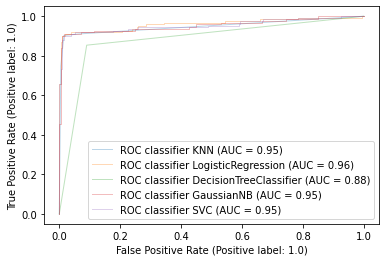

,item 0,item 1,item 2,item 3,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3226,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


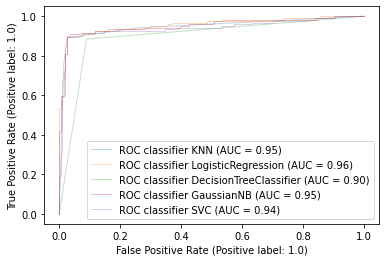

,item 0,item 1,item 2,item 3,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3226,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


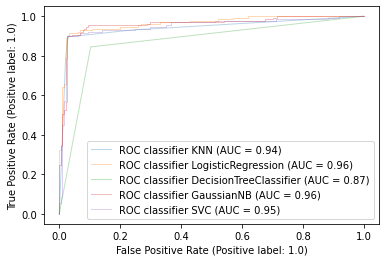

,item 0,item 1,item 2,item 3,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3226,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


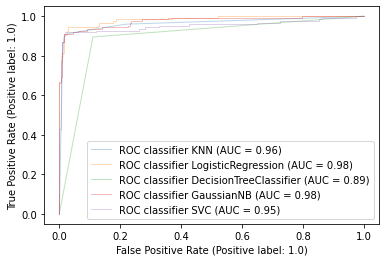

,item 0,item 1,item 2,item 3,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3226,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


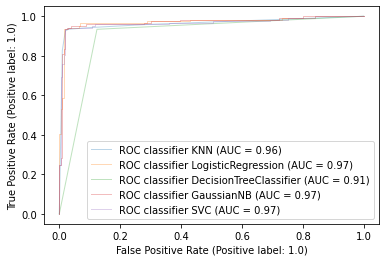

,item 0,item 1,item 2,item 3,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3226,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


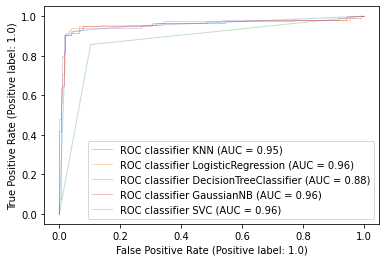

,item 0,item 1,item 2,item 3,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3226,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


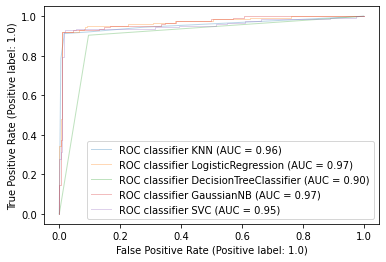

,item 0,item 1,item 2,item 3,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3226,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


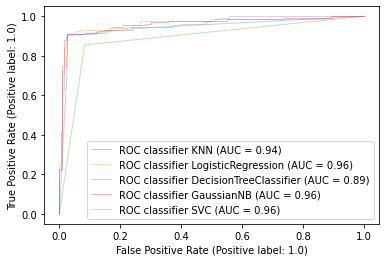

,item 0,item 1,item 2,item 3,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3226,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


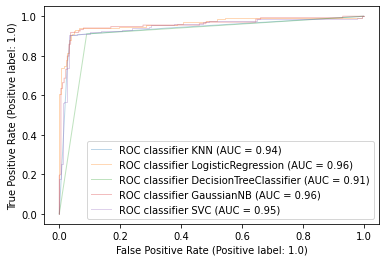

,item 0,item 1,item 2,item 3,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3226,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


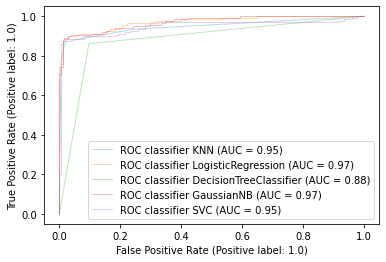

Results for classifier KNN: training score: 0.9505, Accuracy: 0.9452 for Exercise 2.A using simple kfold 

Results for classifier LogisticRegression: training score: 0.9498, Accuracy: 0.9498 for Exercise 2.A using simple kfold 

Results for classifier DecisionTreeClassifier: training score: 1.0000, Accuracy: 0.8928 for Exercise 2.A using simple kfold 

Results for classifier GaussianNB: training score: 0.9498, Accuracy: 0.9498 for Exercise 2.A using simple kfold 

Results for classifier SVC: training score: 0.9498, Accuracy: 0.9498 for Exercise 2.A using simple kfold 



In [27]:
# this list will contain results in dict format in order to display them into dataframe.
results = []

classifier = kFoldCV(filtered_by_item_df, "item {}".format(target_item_id), classifiers)

# ipologizoume tin mesi timi ton apotelesmaton tou taksinomiti mas pou proekipsan apo tin 10-fold-cross-validation
for c in classifiers:
    print("Results for classifier {}: training score: {:.4f}, Accuracy: {:.4f} for Exercise 2.A using simple kfold \n".format(c["name"], np.mean(c["train_scores"]), np.mean(c["acc_scores"])))
    results.append({
    "algorithm": c["name"],
    "test": "Exercise 2.A",
    "folds": "K-Fold",
    "train_score": np.mean(c["train_scores"]),
    "test_score": np.mean(c["acc_scores"])
    })



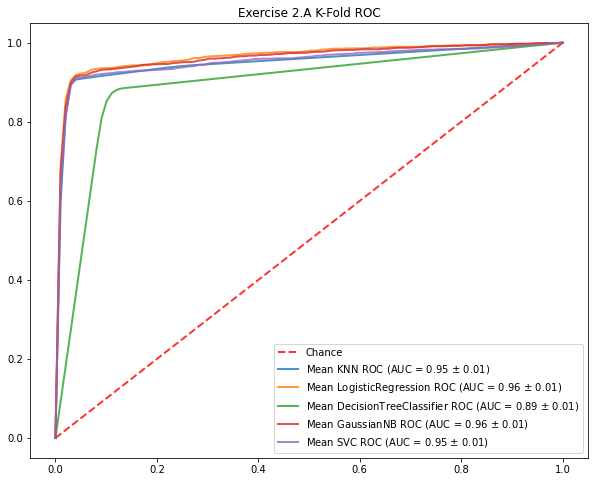

In [28]:
# plot ROC for classifires 
helperUtils.plotROC(classifiers, "Exercise 2.A K-Fold ROC")

### Perform Classification 2.B


In [29]:
transformed_df.rename(columns={"total_assortment_revenue": "label"}, inplace=True)

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


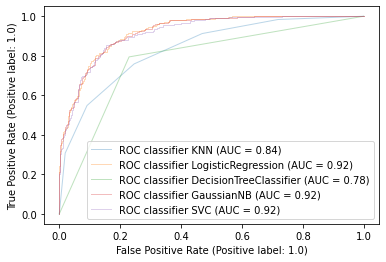

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


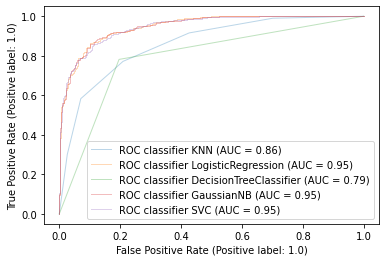

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


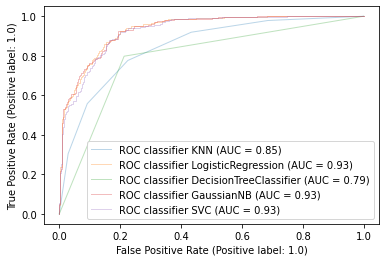

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


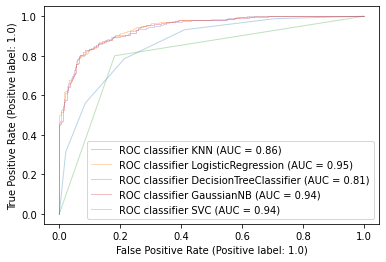

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


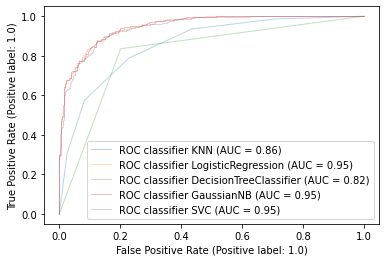

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


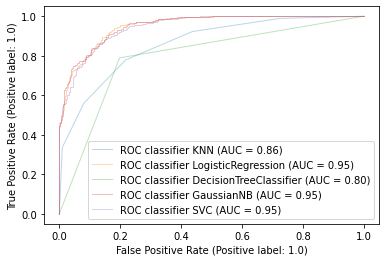

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


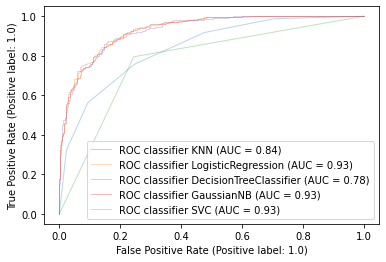

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


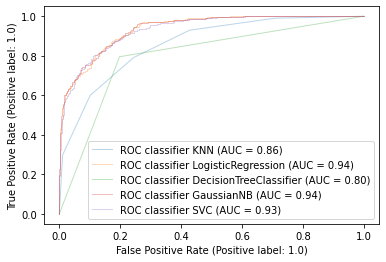

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


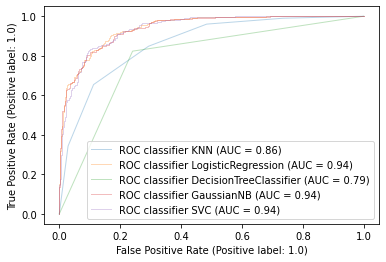

,item 0,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,label
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7838,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7840,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


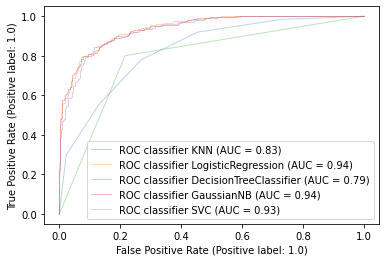

Results for classifier KNN: training score: 0.8601, Accuracy: 0.7724 for Exercise 2.B using simple kfold 

Results for classifier LogisticRegression: training score: 0.8605, Accuracy: 0.8582 for Exercise 2.B using simple kfold 

Results for classifier DecisionTreeClassifier: training score: 1.0000, Accuracy: 0.7950 for Exercise 2.B using simple kfold 

Results for classifier GaussianNB: training score: 0.8595, Accuracy: 0.8568 for Exercise 2.B using simple kfold 

Results for classifier SVC: training score: 0.8895, Accuracy: 0.8554 for Exercise 2.B using simple kfold 



In [30]:
# reset classifiers
for c in classifiers:
    c["acc_scores"] = []
    c["train_scores"] = []

classifier = kFoldCV(transformed_df, "label", classifiers)

# ipologizoume tin mesi timi ton apotelesmaton tou taksinomiti mas pou proekipsan apo tin 10-fold-cross-validation
for c in classifiers:
    print("Results for classifier {}: training score: {:.4f}, Accuracy: {:.4f} for Exercise 2.B using simple kfold \n".format(c["name"], np.mean(c["train_scores"]), np.mean(c["acc_scores"])))
    results.append({
    "algorithm": c["name"],
    "test": "Exercise 2.B",
    "folds": "K-Fold",
    "train_score": np.mean(c["train_scores"]),
    "test_score": np.mean(c["acc_scores"])
    })

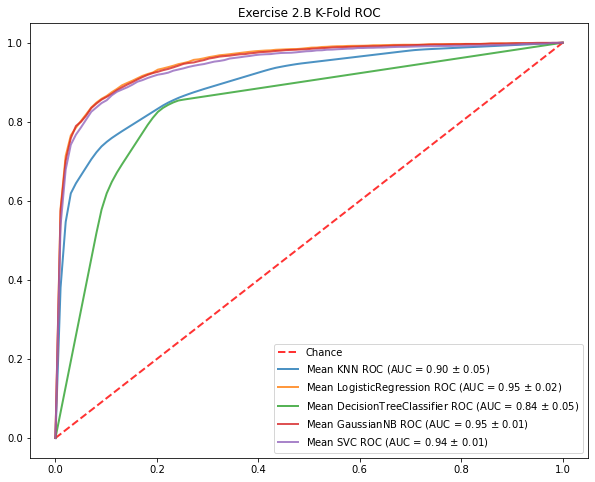

In [31]:
# plot ROC for classifires 
helperUtils.plotROC(classifiers, "Exercise 2.B K-Fold ROC")

In [32]:
folds = ["K-Fold"]
tests = ["Exercise 2.A", "Exercise 2.B"]

classifiers_df = pd.DataFrame.from_dict(results)

classifiers_df = classifiers_df.set_index(['folds', 'test', "algorithm"]) 
# classifiers_df = classifiers_df.set_index('test') 

# classifiers_df = classifiers_df.set_index(folds)
display(classifiers_df)

train_score  test_score
folds  test         algorithm                                      
K-Fold Exercise 2.A KNN                        0.950483    0.945180
                    LogisticRegression         0.949830    0.949827
                    DecisionTreeClassifier     1.000000    0.892844
                    GaussianNB                 0.949830    0.949827
                    SVC                        0.949830    0.949827
       Exercise 2.B KNN                        0.860070    0.772380
                    LogisticRegression         0.860452    0.858200
                    DecisionTreeClassifier     1.000000    0.794952
                    GaussianNB                 0.859545    0.856797
                    SVC                        0.889470    0.855395